Some coding we did at Data Science Workshop : Junction X Shortcut , The Sortcut Lab, 21.09.2019
The data file is here: https://drive.google.com/file/d/1BIoT8KmJBYFWtK-1d31lA4ZZnEepRBBN/view?usp=sharing

In [50]:
# Load useful libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# Load the data from the csv and display it
df = pd.read_csv("user.csv",skiprows=1)
display(df)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,ljbv0JWIqo0UkLM3rRukyA,Andrew,34,2015-11-11,"wd0g1sdv0t_c3izP-dzwsA, 8iR3-iNYomnHJTmOW_YGdg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
99995,iIxVkZmTWmdzFSjtiIYudw,Therese,103,2010-12-13,"AWWHjw13FijOY7L6guq-0w, em_k4RLRpMIJnFitLNOybQ...",55,18,34,6,2017,...,0,0,0,0,6,3,17,17,1,5
99996,iAoviaXKqg503AJD_DTCSA,Ryan,1,2016-05-28,"611X1OIrUX9sMVi5L_EsQw, avLFGjrMz1BpO-gcD_qQ-g...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
99997,29YAiVLItU2eCxPOLG6xNQ,Caitlin,10,2015-05-15,"DELW5OCaITr-3auajcGZNg, FArBkNs7UCu02v1hThwz6w...",0,0,0,1,None,...,1,0,0,0,0,0,0,0,0,0


## Initial analysis of the data

Let's start by doing an initial analysis of the data with the help of an incredibly useful library, pandas_profiling.

Look through the report and use it to understand the dataset better.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 22 columns):
user_id               99999 non-null object
name                  99966 non-null object
review_count          99999 non-null int64
yelping_since         99999 non-null object
friends               99999 non-null object
useful                99999 non-null int64
funny                 99999 non-null int64
cool                  99999 non-null int64
fans                  99999 non-null int64
elite                 99999 non-null object
average_stars         99999 non-null float64
compliment_hot        99999 non-null int64
compliment_more       99999 non-null int64
compliment_profile    99999 non-null int64
compliment_cute       99999 non-null int64
compliment_list       99999 non-null int64
compliment_note       99999 non-null int64
compliment_plain      99999 non-null int64
compliment_cool       99999 non-null int64
compliment_funny      99999 non-null int64
compliment_writer     99

In [53]:
#import pandas_profiling

#df.profile_report(style={'full_width':True})

## Intro to Data Science with Python

Python is a great language for Data Science, especially with the numerous libraries other users have made to easy your work. The most fundamental of these are numpy, pandas and matplotlib.


### Pandas
Data science is about numbers, and most often a lot of numbers. Typically, a data set consists of samples (different users in our dataset) and features (all the properties a user might have). Here, this data is loaded with the pandas-library and stored in a pandas DataFrame object, which is a very useful construct for manipulating large datasets.

You can access different columns of the dataframe with the syntax df.column:

In [54]:
# Access the 'name' column 
# .head(5) makes it only display the first five rows. 
# Try to remove it!
df.name.head(5)

0     Chris
1     Tiffy
2      Mark
3    Evelyn
4      Lisa
Name: name, dtype: object

Pandas also has access to powerful functions. For example, to find the mean and standard deviation of a numerical column, you can simply use:

In [55]:
print("Review count mean:", df.review_count.mean())
print("Review count standard deviation:", df.review_count.std())

Review count mean: 23.643306433064332
Review count standard deviation: 76.60645829145511


If you wish to access multiple columns of a data frame, you can also use the following syntax:

In [56]:
df[['name', 'review_count']].head(5)

,name,review_count
0,Chris,10
1,Tiffy,1
2,Mark,6
3,Evelyn,3
4,Lisa,11


You can find more examples of pandas usage here: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### Exercise

Find the number of users that have more than 10 reviews on the platform.

In [57]:
# Code here
# Hint: You can index a dataframe with true/false values:
# df[df.review_count > x]
df_more10 = df[df.review_count >10]
df_more10.head()


,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,...,0,0,0,0,1,1,1,1,2,0
33,tMNryVdaICS7Vpm5ThNKIA,Alex,13,2014-05-27,None,0,0,0,1,None,...,0,0,0,0,0,2,1,1,0,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,...,4,0,0,0,9,7,7,7,4,0
52,bZkZgll3Fii18x3WRtB5Lg,Dale,62,2010-01-06,None,0,0,0,2,None,...,1,0,0,0,1,0,1,1,0,0


### Numpy

Numpy is a Python library for using and manipulating matrices. You can find some useful code and examples here: https://numpy.org/doc/1.17/user/quickstart.html.

The fundamental construct in numpy is the np.array(), which can turn almost anything into a matrix. Consider the following example of list of lists in Python:

In [58]:
python_list = [[1,2,3], [4,5,6], [7,8,9]]
python_list

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

That looks like a matrix, but it is very difficult to manipulate well and efficiently using the basic Python list data type. Not to mention that most other libraries that are used to do data science with Python only accept pandas/numpy matrices. Thankfully, it is easy to to transform the above data into a numpy matrix:

In [59]:
numpy_matrix = np.asarray(python_list)
numpy_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

One of the greatest features of numpy is its powerful indexing methods. You can access rows, columns and single numbers of a matrix in a simple manner:

(Remember that matrices are indexed in row-major order, i.e. to access i'th rows j'th object, the syntax is matrix[i,j])

In [60]:
# Get matrices 2nd row and 1st column
print("2nd row, 1st column number:")
print(numpy_matrix[2,1])

# Get first row of the matrix (: means slice, i.e. select all numbers)
print("First row:")
print(numpy_matrix[0,:])

# Get first column of the matrix
print("First column:")
print(numpy_matrix[:,0])

2nd row, 1st column number:
8
First row:
[1 2 3]
First column:
[1 4 7]


Pandas and numpy work well with each other. You can turn the above matrix into a pandas dataframe simply by

In [61]:
pd.DataFrame(numpy_matrix, columns=['first_col', 'second_col', 'third_col'])

,first_col,second_col,third_col
0,1,2,3
1,4,5,6
2,7,8,9


And other way round, you can turn pandas dataframe into a numpy matrix. Let's try it with our 'users' dataframe:

In [62]:
df[['review_count', 'useful', 'funny']].values

array([[10,  0,  0],
       [ 1,  0,  0],
       [ 6,  0,  0],
       ...,
       [ 1,  0,  0],
       [10,  0,  0],
       [12,  0,  0]], dtype=int64)

As you can see, the tradeoff is that we lose a lot of useful information, but on the other hand get a nice matrix which is efficient to modify.

Like pandas, numpy has a large number of useful functions to get information about the matrix, like mean and standard deviation. 

In [63]:
tmp_data = df[['review_count', 'useful', 'funny']].values

# Mean of first column
print(np.mean(tmp_data[:,0]))

# Standard deviation of second column:
print(np.std(tmp_data[:,1]))

23.643306433064332
592.5943321228746


Looks like the standard deviation of the 'useful' column is huge!

#### Exercise

Find the sum of all reviews!

Hint: np.sum() function

In [64]:
# Enter code here
np.sum(tmp_data[:,0])

2364307

#### Exercise

Find the mean median of the review count. What do these numbers tell you?

Hint: np.median() function

In [65]:
# Enter code here
np.median(tmp_data[:,0])

5.0

### Pandas  indexing

In [66]:
df.head(5)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


Take a look at the first five items of the dataframe above. At the left, there is a rolling number starting from zero, which is the index of the row. Notice that if we take some subset of the data, for example all users with the name Chris, the index does not reset:

In [67]:
df[df.name == 'Chris']

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
11,Mmv5fPxbF8XEMN4EPT_Khg,Chris,2,2016-06-24,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
181,HyrFKNe43hPHVFoFgZ7AuQ,Chris,22,2014-07-06,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
197,HnLtM53Ko1BY7DS737I06Q,Chris,2,2017-10-26,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
316,CAqTRA6o_19Bgresxn6R1w,Chris,16,2016-02-29,None,1,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,yPr31e8JjIp0P2Qbt9yfcA,Chris,18,2011-08-09,None,6,4,0,0,None,...,0,0,0,0,0,0,0,0,0,0
99960,tBtOjMnVjy7Kq-CPx67w_g,Chris,30,2011-02-18,"a6c7hXreFMWjVcoiNNiljg, 402n5ZGvXa7XWjDAn6uhfg...",27,3,3,1,None,...,0,0,0,0,0,0,1,1,0,0
99971,HsvDWPLp85FynWE0gHPi9g,Chris,48,2012-05-04,"BQJfh_mpfVb1_sRkB-Qo1A, q2odRqeOvAQVlN2LGM1nvA...",50,2,8,0,None,...,0,0,0,0,3,2,0,0,0,2
99977,R-Zw2sDjxW0Ue6wuGky3YA,Chris,3,2010-03-09,"XscY1qb7FJSVgntLZIm-iA, q50PWB-QR1YCHa60kagzgw...",2,3,2,0,None,...,0,0,0,0,0,0,0,0,0,0


This is very useful, as you always know what row you are dealing with in the original dataframe even if you are working with a subset of the data. However, this makes pandas indexing sometimes a bit confusing. If you wish to get a certain item in a dataframe, you have to use the .iloc function:

In [68]:
# Access certain index in the df:
df.iloc[11]

user_id               Mmv5fPxbF8XEMN4EPT_Khg
name                                   Chris
review_count                               2
yelping_since                     2016-06-24
friends                                 None
useful                                     0
funny                                      0
cool                                       0
fans                                       0
elite                                   None
average_stars                           1.67
compliment_hot                             0
compliment_more                            0
compliment_profile                         0
compliment_cute                            0
compliment_list                            0
compliment_note                            0
compliment_plain                           0
compliment_cool                            0
compliment_funny                           0
compliment_writer                          0
compliment_photos                          0
Name: 11, 

In [69]:
# The same iloc in the subset:
df[df.name == 'Chris'].iloc[11]

user_id                                          ABnqflUIsx4CRHv7ckUMOA
name                                                              Chris
review_count                                                          4
yelping_since                                                2013-08-17
friends               E7zeUWsaiAGyQk1aDwn72Q, cBNfp7PTPlO-fkKFvFYm7w...
useful                                                                0
funny                                                                 0
cool                                                                  0
fans                                                                  0
elite                                                              None
average_stars                                                       3.4
compliment_hot                                                        0
compliment_more                                                       0
compliment_profile                                              

#### Exercise

Find the user with the highest number of reviews! 

Hint: You first need to find the row # with the largest number of reviews and then access it with .iloc[]

Hint 2: numpy has an interesting function called [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [70]:
# Code here
np.argmax(df.review_count)
df.iloc[48445]

C:\Users\dmitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


user_id                                          E_GAXhVA1_lVC2aFpMQElA
name                                                              Alden
review_count                                                       3468
yelping_since                                                2009-09-03
friends               7ZauzmeTHuR-8FqnmJbOtA, yFcfowj9X6C6zNd6nqK8aQ...
useful                                                              183
funny                                                               145
cool                                                                 84
fans                                                                215
elite                                            2016, 2014, 2017, 2015
average_stars                                                      3.74
compliment_hot                                                       74
compliment_more                                                      21
compliment_profile                                              

### Matplotlib

Matplotlib is a plotting library for Python. It allows us to visualize the dataset, an indispensable tool for Data Science work. Find the documentation here: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py.

The basic syntax of matplotlib is simple. You give it data on x- and y-axis, and it plots it. You can choose between many different plot types, but most often you want to use line plot (plt.plot) or scatter plot (plt.scatter). Let's look at how you might construct such a plot.

Text(0, 0.5, 'Average stars')

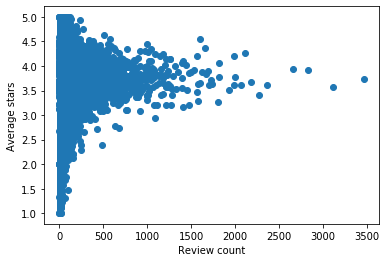

In [71]:
plt.figure()
plt.scatter(df.review_count, df.average_stars)
plt.xlabel('Review count')
plt.ylabel('Average stars')

#### Exercise

Plot a histogram of a numerical column of your choice. For example, to find if the star rating is skewed, plot the df.average_stars column.

Hint: plt.hist()

(array([ 7375.,  1048.,  2903.,  3563.,  3747., 12668., 14682., 16179.,
        11754., 26080.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

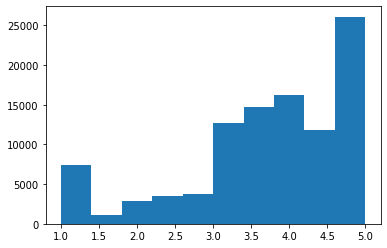

In [72]:
# Code here
plt.figure()
plt.hist(df.average_stars)


#### Exercise

To find out the correlations between variables, plot a correlation matrix. You can use pandas function df.corr() to get the correlation matrix, and plt.matshow() function to plot it. If you want more colors, you can change the color map in the plotting function with argument cmap='jet'.

Take a look at the correlation plot and try to reason about it. Which variables are highly correlated? Which are not? What does this tell you about the review process?

<Figure size 720x720 with 0 Axes>

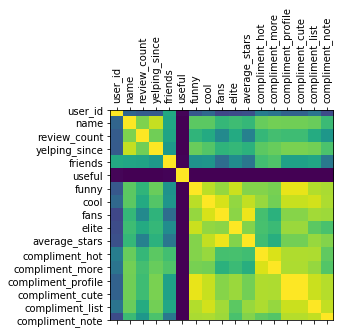

In [73]:
%matplotlib inline
plt.figure(figsize=(10,10))

# Plotting code here

plt.matshow(df.corr());

plt.xticks(np.arange(0,len(df.corr().columns)), df.columns, rotation='vertical')
plt.yticks(np.arange(0,len(df.corr().columns)), df.columns)
plt.show();

### Visualizing with Principal component analysis

It is difficult to visualize a dataset with so many variables. We would like to see the complete dataset in a 2D scatter plot, but there are 16 features, requiring a 16 dimensional plot. This is impossible, so we need to reduce the dimensions somehow.

A tool often used by data scientists is the principal component analysis (PCA), which tries to represent the data using fewer features by projecting dimensions to the direction of their variance. If you want to know more, check wikipedia or this link: https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

Here, we'll use pca to reduce the dimensions to just two, which we can plot. We use sklearn's prebuilt PCA function to calculate the values.

In [74]:
from sklearn.decomposition import PCA

# Grab the numerical features of the dataset for simplicity
numerical_data = df.select_dtypes(include=[np.number])

pca = PCA(n_components=2)
data_transformed = pca.fit_transform(numerical_data)

In [75]:
data_transformed.shape

(99999, 2)

### Exercise

The data_transformed now only has two dimensions. Plot them in a 2D scatter plot! You need to use the numpy indexing to select one column and all rows as x-axis and the second column and all its rows as the y-axis.

Extra: Color the dots with their average star rating!

Extra 2: There are some outliers in the data, making analysis difficult. Try to identify and remove them!

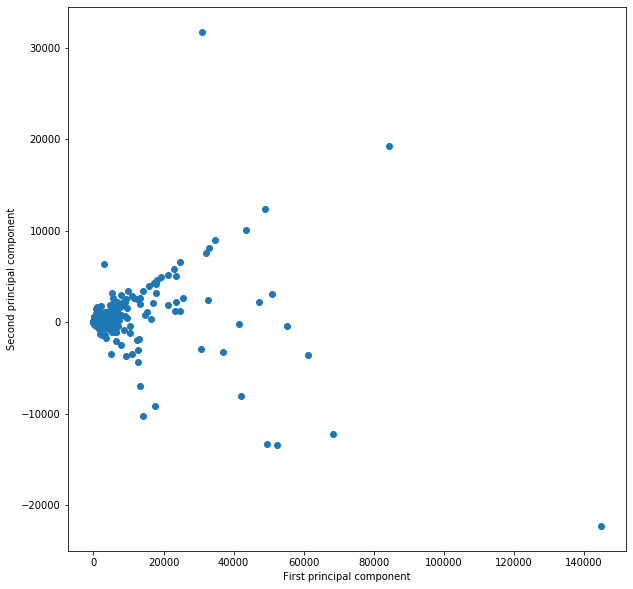

In [76]:
plt.figure(figsize=(10,10))

# Code here


plt.scatter(data_transformed[:,0], data_transformed[:,1])


plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

Try to see if there are any clusters or other structure in the data. This helps you to understand what is actually happening in the data.

## SKLearn

Alright, so you can now handle even large datasets and extract useful information about it. But, you say, I want to know what rating a user will give in advance! Well, you are in the right place to learn about that. 

What we will do is to predict the user's average star rating based on the other features the user has. Let's start by grabbing all the numerical columns in the dataset (we'll skip the non-numerical ones in this exercise).

In [77]:
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.head(5)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,10,0,0,0,0,3.70,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2.00,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,4.67,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,4.67,0,0,0,0,0,0,0,0,0,0,0
4,11,4,0,0,0,3.45,0,0,0,0,0,0,0,0,0,1,0


To predict the average star rating based on other features, we need a model. A model is a function that maps from features to the target variable. This function can be very simple, like a linear model you learned about in high school: 
$$
f: y = kx + b
$$

That's easy to solve, as 
$$
b = mean(y)
$$
and 
$$
k = \frac{y - b}{x}
$$

Where $y$ is the target variable (here, average stars) and $x$ some feature, like review_count. You could include more features in the linear function:

$$
f: y = w_1x_1 + w_2x_2 + w_3x_3 + ... w_kx_k + b
$$

where each $x_1, x_2, ..., x_k$ is a different feature in the dataset and $w_1, w_2, ..., w_k$ a weight for that feature that is used for prediction. Matematicians will see that $\vec{w}$ and $\vec{x}$ can be represented as vectors or matrices:

$$
\vec{w} = [w_1, w_2, ..., w_k, w_b]
$$
$$
\vec{x} = [x_1, x_2, ..., x_k, 1]
$$

Here the bias $b$ is incorporated in the $\vec{x}$ array as a column of ones. Using the dot product, the above function reduces to:

$$
y = \vec{w}^T\vec{x}
$$

(check the wikipedia page on dot product if you need a refresh on matrices and vectors).

However, in a dataset, we have many samples, so we stack them into a matrix where rows are samples and columns the feature vectors. In this way, we can predict a large number of samples in one shot:

$$
\vec{y} = \vec{X}\vec{w}
$$

### Sklearn

However, you don't need to be a mathematician to be a Data Scientist! Instead, you can use the many models someone else has already made for you. Here, we'll use the great python library sklearn to train a model that can predict the user's average stars based on their other features. First, we grab all the numerical features in the dataset, and construct our features (everything except average stars column) and target (average stars)

In [78]:
y = df_numerical['average_stars']
X = df_numerical.drop('average_stars', axis=1)

In [79]:
y.head(5)

0    3.70
1    2.00
2    4.67
3    4.67
4    3.45
Name: average_stars, dtype: float64

In [80]:
X.head(5)
X.shape

(99999, 16)

We need a separate training and test set so that we don't test a model with data it has already seen. (Why?)

So let's start by splitting the dataset into a training and validation set. This is easy with sklearn's preprocessing module:

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

74999 74999 25000 25000


We use a simple random forest model (read more about it here: https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

Sklearn's model api is incredibly simple. We just import the model, fit the data to it and then predict the test data. Afterwards we look at the results and the accuracy of our model.

In [83]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [84]:
regr = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
regr.feature_importances_

array([0.34934565, 0.24301902, 0.02472062, 0.11231919, 0.05453445,
       0.04117839, 0.0014334 , 0.00058666, 0.00211681, 0.        ,
       0.12786971, 0.01557829, 0.00523789, 0.00508165, 0.0062947 ,
       0.01068355])

In [85]:
y_pred = regr.predict(X_test)

In [86]:
# Calculate mean squared error
mse = np.mean((y_pred - y_test)**2)

In [87]:
print(mse)

1.264230878069125


Our mean squared error was 1.264. Now you can predict the average stars of a user using this model!

### Exercises

We calculated the mean squared error of our predictions. Try to calculate the mean average error and see how it differs from the root of the mean squared error. Why are the values different/same? How does the error metrics differ and what does each tell you?

In [88]:
# Code here
m_av_val = np.mean(np.sqrt((y_pred - y_test)**2))
root_mse = np.sqrt(mse)
print(m_av_val)
print(root_mse)

0.8811939602475947
1.1243802195294637


Find out the mean and standard deviation of the predictions array y_pred

In [89]:
# Code here
m_y_pred = np.mean(y_pred)
print(m_y_pred)
st_dev_y_pred = np.std(y_pred)
print(st_dev_y_pred)

3.7211229407932773
0.1369263932285764


Make your own feature vector that you might have on the platform, and predict what your average star rating is.

In [90]:
# Code here

X1 = df_numerical.drop('average_stars', axis=1).head(1)
X1
y_pred1 = regr.predict(X1)
y_pred1

array([3.86464786])

Often, it is useful to see what variables were the most important after fitting a model. You can find these values with the feature_importances property of the model.

Task: Plot the feature importances of the Random Forest Regression model. 

Hint: take a look at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [91]:
# Code
regr.feature_importances_

array([0.34934565, 0.24301902, 0.02472062, 0.11231919, 0.05453445,
       0.04117839, 0.0014334 , 0.00058666, 0.00211681, 0.        ,
       0.12786971, 0.01557829, 0.00523789, 0.00508165, 0.0062947 ,
       0.01068355])

There are many models for different situations. Check sklearn's supervised learning module at https://scikit-learn.org/stable/supervised_learning.html, pick some other model than random forest and experiment with the results.

In [92]:
# Code

In [93]:
#we use Gradient Boosting Regression
regr = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=200)
regr.fit(X_train, y_train)
regr.feature_importances_

array([0.26391219, 0.20872256, 0.07716088, 0.12926069, 0.0651397 ,
       0.04145612, 0.01062216, 0.00435855, 0.00930227, 0.0012385 ,
       0.09714409, 0.02867176, 0.01672816, 0.01430534, 0.01182821,
       0.02014883])

In [94]:
y_pred = regr.predict(X_test)
# Calculate mean squared error
mse = np.mean((y_pred - y_test)**2)
print(mse)

1.2629992571963689


The result for GradientBoostingRegression is a little bit better then for Random Forest Regression

In [95]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [96]:
#We try to use the method
regr = make_pipeline(RobustScaler(), Lasso(alpha = 1.0, random_state=1))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# Calculate mean squared error
mse = np.mean((y_pred - y_test)**2)
print(mse)

1.2870078149572604


In [97]:
# and this one , but the results are not better (we did it with aplha from 0.005 to 100.0, about same results)
regr = make_pipeline(RobustScaler(), ElasticNet(alpha=1.0, l1_ratio=.9, random_state=3))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# Calculate mean squared error
mse = np.mean((y_pred - y_test)**2)
print(mse)

1.287007158467205
